# Introduction to complex networks theory
## Lesson 14: Processes on networks

In this notebook we will simulate simple processes on networks. 
Specially:
- we will introduce node state initialization and update rules
- we will use simulations to test out different epidemiologic models (SI/SIS/SIR...) on different networks
- we will investigate how different model parameters (e.g. disease infectiousness) and different patient zero possibilities (nodes with different centrality values) will affect numbers of infected individuals

*This notebook is based on simulation class developed for chapter 7 tutorial of the book First Course on Network Science. You can find the original tutorial notebook [here](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/Chapter%207%20Tutorial.ipynb).*

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

import numpy as np
import pandas as pd

### Simulation on the network

We will use ```simulation.py``` file that you can find in the local folder. It is a python script that contains a Simulation class that will enable us to run simulations of processes on networks without going into simulation details (but do have a look at the content of the file) and instead focus our attention on the process analysis and variation of the parameters and networks.

A simulation of a process needs:
1. the network on which we run a process
2. the initial state of network nodes
3. the rule based process of node state changes


Creating a network is something we're familiar by now. While we get familiarized with the simulation options, we'll use a simple regular network so that more easily we can track changes:

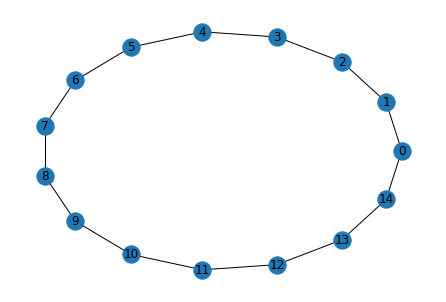

In [2]:
G = nx.cycle_graph(15)
nx.draw_circular(G,with_labels=True)

The simulation changes states of nodes at every time step based on some rules we set up. 
- In the case of epidemics modelling, the states of the node are either susceptible, infected, recovered, etc (based on the model we use SI/SIR).
- In the case of information spreading, the node is a person that can be in the possesion of information or not.
- In the case of failure propagation in technological networks, a state of a node can be functioning or failed.

The key ingredient of our modeling is the choise of an update rule. This rule describes how the state of the node change based on neighbours or other relevant information. This will become clearer with the following example:

To get familiar with the simulation class and its properties, let's first deal with a simple example of a population of users who can be offline or online.

#### Initial states
We first define an initial state for each node, in this case we assume everyone is offline at the start of simulation:

In [3]:
def initialize_node_states(G):
    state = {} # dictionary in which we will keep state for each node
    for node in G.nodes: #iterate over all nodes
        state[node] = 'offline' # here we can define state of each node
    return state

In [4]:
initialize_node_states(G)

{0: 'offline',
 1: 'offline',
 2: 'offline',
 3: 'offline',
 4: 'offline',
 5: 'offline',
 6: 'offline',
 7: 'offline',
 8: 'offline',
 9: 'offline',
 10: 'offline',
 11: 'offline',
 12: 'offline',
 13: 'offline',
 14: 'offline'}

#### Update rule
...defines a way each node state is updated. In this simple demonstration, we will assume an offline person can randomly decide whether it will change its current state to online with probability p_flip:

In [5]:
P_FLIP = 0.1

def update_states(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'offline':
            if random.random() < P_FLIP:
                next_state[node] = 'online'
    return next_state

Let's test this function:

In [6]:
test_state = initialize_node_states(G) # initialize network states
update_states(G, test_state) # run single update and return only nodes with changed states

{6: 'online'}

In the simulation, we want to repeat this update process variable number of times and also we want to be able vary parameters (here flip probability) and see how it affects the final state. For that we will use Simulation class:

In [7]:
from simulation import Simulation

In [8]:
?Simulation

In [9]:
sim = Simulation(G, initialize_node_states, 
                 update_states, 
                 name='Online simulation test')

sim, now one instance of the Simulation class has some properties and methods related to it, for example, we can see the state:

In [10]:
sim.state()

{0: 'offline',
 1: 'offline',
 2: 'offline',
 3: 'offline',
 4: 'offline',
 5: 'offline',
 6: 'offline',
 7: 'offline',
 8: 'offline',
 9: 'offline',
 10: 'offline',
 11: 'offline',
 12: 'offline',
 13: 'offline',
 14: 'offline'}

Everyone is offline initially, this is based on our initialization function. We can also use function `draw` that will draw the network and collor its nodes based on the state they are in:

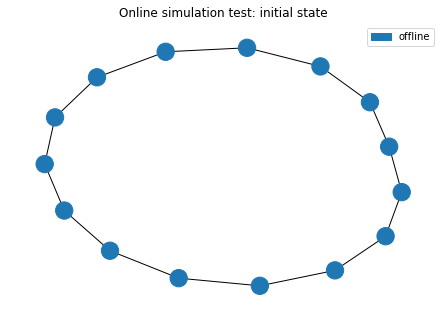

In [11]:
sim.draw()

Now, something that is more useful, we can use methods `run` to update the state of the network:

In [12]:
sim.run()

Only running the simulation changes the state of nodes, but we don't see what is changed and we can do that by repeating the draw function, this time with node labels:

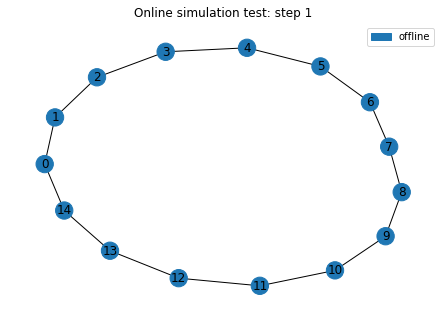

In [13]:
sim.draw(with_labels=True)


We see some nodes randomly turned online. Instead of drawing, we can also inspect the state of each node by looking at the node dictionary:

In [14]:
sim.state()

{0: 'offline',
 1: 'offline',
 2: 'offline',
 3: 'offline',
 4: 'offline',
 5: 'offline',
 6: 'offline',
 7: 'offline',
 8: 'offline',
 9: 'offline',
 10: 'offline',
 11: 'offline',
 12: 'offline',
 13: 'offline',
 14: 'offline'}

There is no need to run the update every time step one by one, instead we can say how many times we want the simulation to run the update rule:

In [15]:
sim.run(10)

By investigating 'steps' we can see how many times the network nodes were updated:

In [16]:
sim.steps

11

We can repead the drawing to see now what is the state:

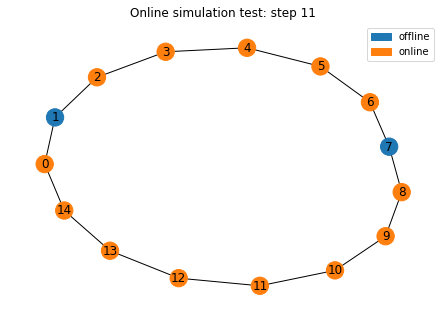

In [17]:
sim.draw(with_labels=True)


Also, we can inspect the netwrok at any previous simulation step, e.g. after only 2 time steps:

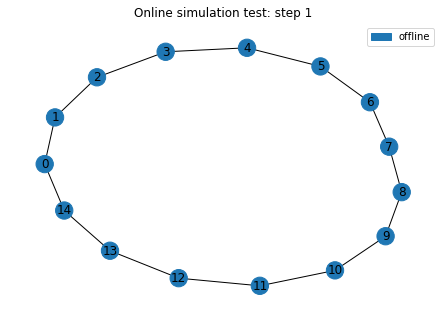

In [18]:
sim.draw(1,with_labels=True)

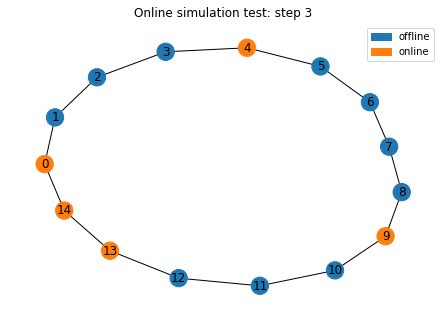

In [19]:
sim.draw(3,with_labels=True)

And similarly we can get node states at any given simulation step"

In [20]:
sim.state(2)

{0: 'online',
 1: 'offline',
 2: 'offline',
 3: 'offline',
 4: 'offline',
 5: 'offline',
 6: 'offline',
 7: 'offline',
 8: 'offline',
 9: 'online',
 10: 'offline',
 11: 'offline',
 12: 'offline',
 13: 'offline',
 14: 'offline'}

The simulation class has also conviently implemented function that plots fraction of nodes in each of the available states:

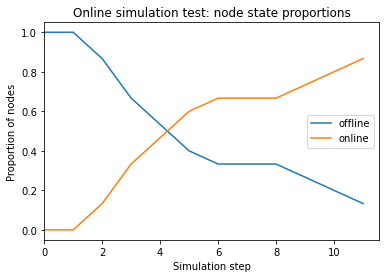

In [21]:
sim.plot()
plt.show()

How would you get average number of online users after exactly 10 simulation steps by repeating this experiment 100 times:

In [22]:
sim.state(10)

{0: 'online',
 1: 'offline',
 2: 'online',
 3: 'online',
 4: 'online',
 5: 'online',
 6: 'online',
 7: 'offline',
 8: 'online',
 9: 'online',
 10: 'online',
 11: 'offline',
 12: 'online',
 13: 'online',
 14: 'online'}

In [23]:
#place for your code here

count_list = []
# loop 100 times
for i in range(100):
    sim = Simulation(G, initialize_node_states, 
                 update_states, 
                 name='Online simulation test')
    # run simulation with 10 steps
    sim.run(50)
    # count online users at last time step
    count = sum(np.array(list(sim.state().values()))=='online')
    # save count to a list
    count_list.append(count)

In [24]:
np.mean(count_list)

14.91

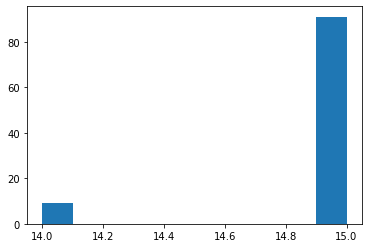

In [25]:
plt.hist(count_list)
plt.show()

In this simple case we see that over time more and more people are online. That is because we didn't include any option for them to drop back to being offline and every time step either someone new becomes online, or nothing changes. Thus it is always an increasing number of online and consequently decreasing function of offline users.

We started with this simple rule just to investigate options the simulations give us, now, let's swith to epidemic modelling.

#### Epidemics

We can again initially use a simple graph, or you can change G into any graph you might want:

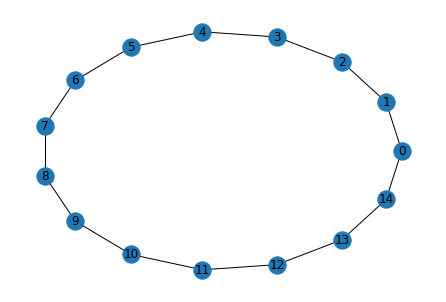

In [26]:
G = nx.cycle_graph(15)
nx.draw_circular(G,with_labels=True)

##### Initial state function
Here we define that we deal with SI models. Usually, we investigate early onsets of epidemics, which means we focus on a population with only one infected person:

In [27]:
def initialize_node_states(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S' 
        
    # we choose a single node to be infected at random
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    
    return state

In [28]:
initialize_node_states(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'I',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'S'}

##### Update rule function

In [29]:
BETA = 0.1 # probability that a node will be infected in a connctact with an infected individual

def state_transition_SI(G, current_state):
    next_state = {}
    for node in G.nodes: # for every node
        if current_state[node] == 'S': # we update only sussceptible individuals
            for neighbor in G.neighbors(node): # update only happens if S individual is connected to an I individual
                if current_state[neighbor] == 'I':
                    if random.random() < BETA: # disease is transmitted with probability beta
                        next_state[node] = 'I'

    return next_state

Let's test this using new initial state and investigating next state:

In [30]:
test_state = initialize_node_states(G)
test_state

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'I'}

In [31]:
state_transition_SI(G, test_state)

{}

It is possible that within a single time step there is no change in the number of infected nodes. You can test this out by increasing beta and investigating whether that will change potential outcome. Or, you can run this multiple times and investigate the results. What do you conclude, can any node become infected?

Let us now use these functions within the simulation:

In [32]:
sim = Simulation(G, initialize_node_states, state_transition_SI, name='SI model')

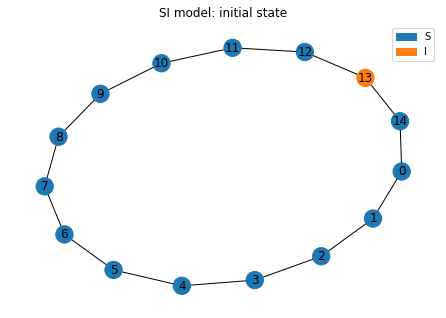

In [33]:
sim.draw(with_labels=True)

Let's run simulation for 50 time steps:

In [34]:
sim.run(50)

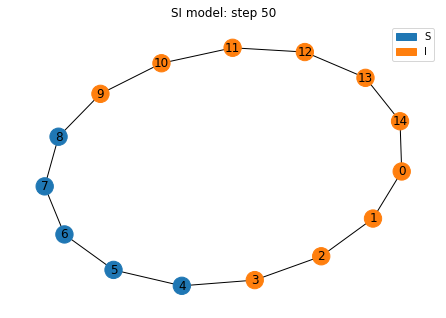

In [35]:
sim.draw(with_labels=True)

We see that even after 50 steps not everyone is infected. What do you think why is that so?

If we used BETA = 1 what would be the number of steps needed for everyone to be infected?

We can also look at the plots showing number of susceptible and infected individuals over time:

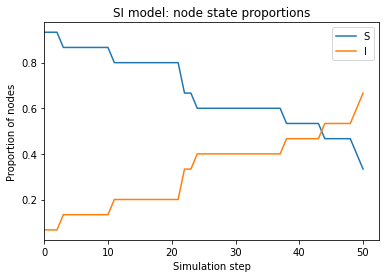

In [36]:
sim.plot()
plt.show()

How would you get all states for the single node?

In [37]:
# place for your code

In [38]:
states = []
node = 1
for i in range(50):
    states.append(sim.state(i)[node])
states

['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I']

In [39]:
# alternative solution
[sim.state(i)[node] for i in range(sim.steps)]

['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I']

##### Fully connected network
Let's try our model on the fully connected networks as well, that matches mathematical formulations we convered during the presentation.

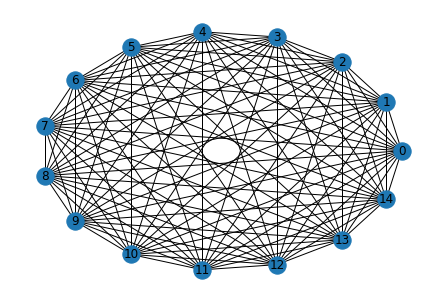

In [40]:
G = nx.complete_graph(15)
nx.draw_circular(G,with_labels=True)

In [41]:
sim = Simulation(G, initialize_node_states, 
                 state_transition_SI, name='SI model')

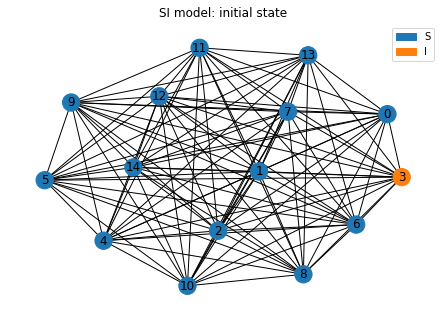

In [42]:
sim.draw(with_labels=True)

In [43]:
sim.run(25)

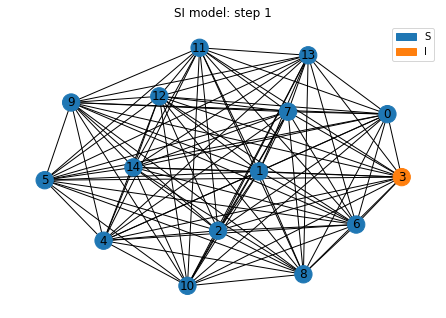

In [44]:
sim.draw(1,with_labels=True)

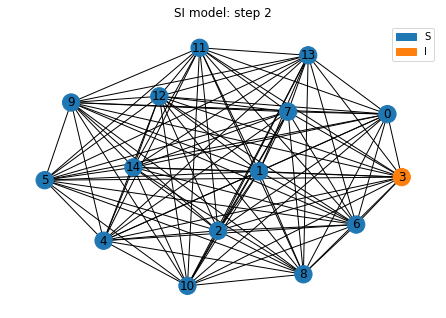

In [45]:
sim.draw(2,with_labels=True)

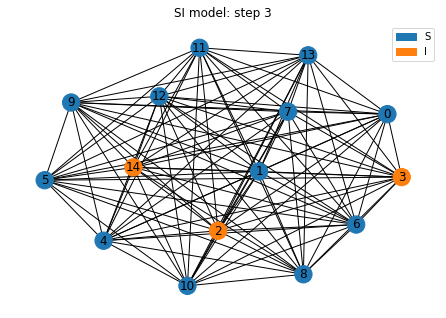

In [46]:
sim.draw(3,with_labels=True)

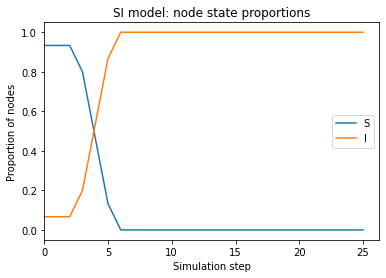

In [47]:
sim.plot()
plt.show()

Here we saw even in this simple case of network that the same probabilities of infection spreading creates drastically different results in the same amount of time.

#### stop condition

Sometimes (like in the case of fully connected graph above), we don't need the simulation to run for 50 steps if already at small number of step everyone is infected. That is becuase for some update rules after this point nothing changes, and we can stop running the simulation. The class we use has a built up option to add stop condition, let's try to utilise that:

In [48]:
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) == 1 # means that every node is in the same state
    return is_stopped

Now we can initalize simulation with stop condition function next to the initialization and update rules:

In [49]:
sim = Simulation(G, initialize_node_states, state_transition_SI, stop_condition, name='SI model with stop')
sim.run(100)

Stop condition met at step 5.


We got info when the simulation stopped due to stop condition being satisfied. We can check that by calling sim.steps which will tell us exactly how many steps were run:

In [50]:
sim.steps

5

As before we can plot and check number of steps that way as well:

<AxesSubplot:title={'center':'SI model with stop: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

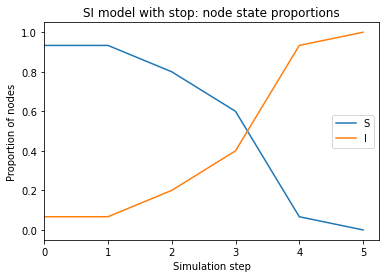

In [51]:
sim.plot()

###### random graph

Let's try now the same model but on the random graph:

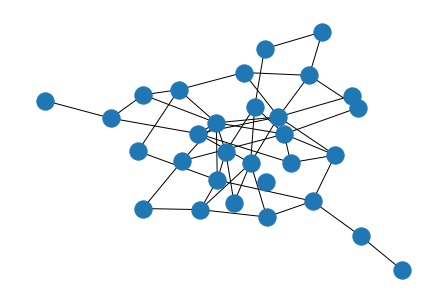

In [52]:
G = nx.gnm_random_graph(30,50)
nx.draw_kamada_kawai(G)

In [53]:
nx.is_connected(G)

False

Try repeating the following block of code several times to see how the results might differ. That can be particularly interesting if the random network you created is disconnected (for that purpose above line of code checks that).

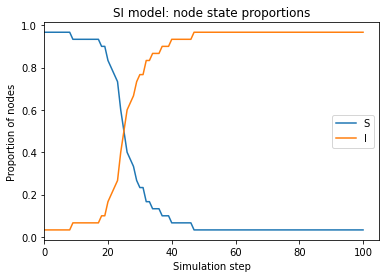

In [70]:
sim = Simulation(G, initialize_node_states, state_transition_SI, 
                 name='SI model')
sim.run(100)

sim.plot()
plt.show()

Any simulation that gave you interesting timeseries plot, you can inspect looking at the network at different time stages:

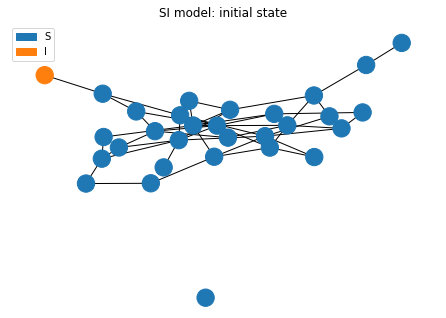

In [71]:
sim.draw(0)

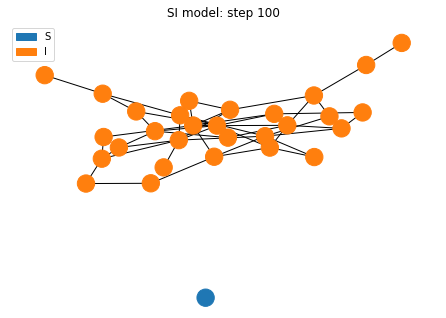

In [72]:
sim.draw()

#### SIS
Let's change this into a SIS model, what is different?

We will keep the same initialization function, but the update rule changes as below:

In [73]:
# G = nx.cycle_graph(15)
G = nx.complete_graph(15)

def initialize_node_states(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S' 
        
    # we choose a single node to be infected at random
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    
    return state


BETA = 0.1 # probability that a node will be infected in a connctact with an infected individual
GAMMA = 0.05 # probability that an infected node will recover within the unit time

def state_transition_SIS(G, current_state):
    next_state = {}
    for node in G.nodes: # for every node
        if current_state[node] == 'S': # we update only sussceptible individuals
            for neighbor in G.neighbors(node): # update only happens if S individual is connected to an I individual
                if current_state[neighbor] == 'I':
                    if random.random() < BETA: # disease is transmitted with probability beta
                        next_state[node] = 'I'
        elif current_state[node] == 'I':
            if random.random() < GAMMA:
                next_state[node] = 'S'

    return next_state

Try out different beta and gamma values to try to find combinations that lead to outbreak eradications and situations where less than the full population ends up infected.

In [86]:
BETA = 0.3 
GAMMA = 0.05

sim = Simulation(G, initialize_node_states, state_transition_SIS, 
                 name='SIS model')
sim.run(100)

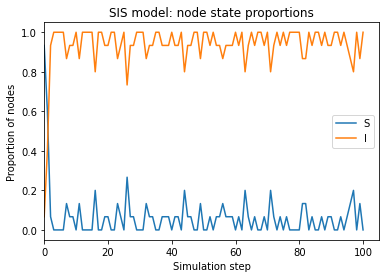

In [87]:
sim.plot()
plt.show()

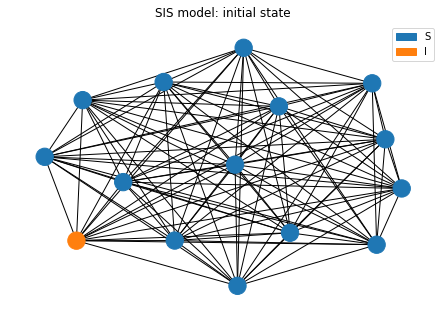

In [88]:
sim.draw(0)

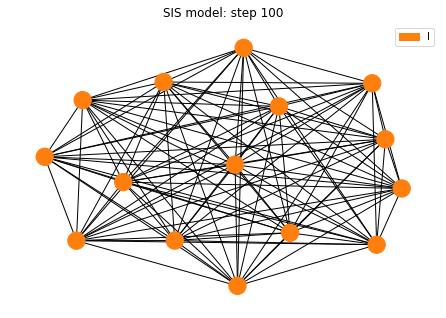

In [89]:
sim.draw()

#### SIR
Finally, let's change functions into a SIR model, and this time, let's try to initialize the pandemic at the node with highest degree, how would you implement that?

In [90]:
def initialize_node_states(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S' 
    
    degs=dict(G.degree())
    patient_zero = max(degs, key=degs.get)
    
    # we choose a single node to be infected at random
#     patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    
    return state


# BETA = 0.1 # probability that a node will be infected in a connctact with an infected individual
# GAMMA = 0.05 # probability that an infected node will recover within the unit time

def state_transition_SIR(G, current_state):
    next_state = {}
    for node in G.nodes: # for every node
        if current_state[node] == 'S': # we update only sussceptible individuals
            for neighbor in G.neighbors(node): # update only happens if S individual is connected to an I individual
                if current_state[neighbor] == 'I':
                    if random.random() < BETA: # disease is transmitted with probability beta
                        next_state[node] = 'I'
        elif current_state[node] == 'I':
            if random.random() < GAMMA:
                next_state[node] = 'R'

    return next_state

In [91]:
# G = nx.complete_graph(500)
G = nx.gnm_random_graph(50,200)

In [92]:
BETA = 1 
GAMMA = 0.05

sim = Simulation(G, initialize_node_states, state_transition_SIR, 
                 name='SIR model')
sim.run(100)

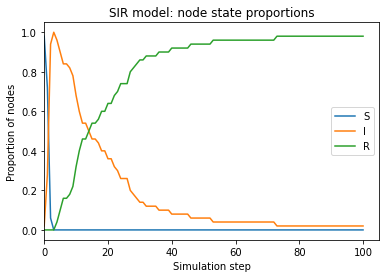

In [93]:
sim.plot()
plt.show()

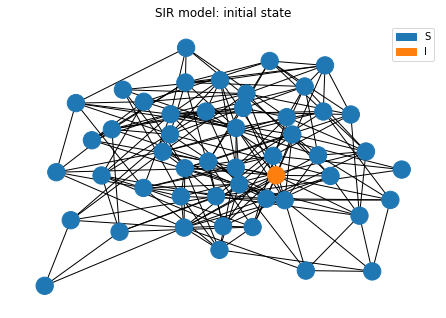

In [94]:
sim.draw(0)

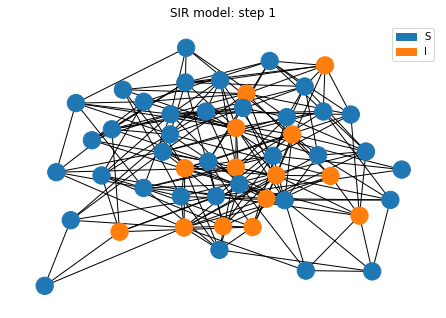

In [95]:
sim.draw(1)

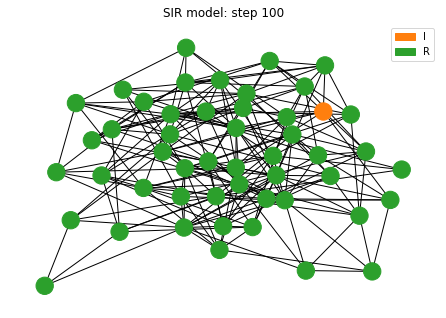

In [96]:
sim.draw()

Finally, you xan use some of the networks we used in notebooks so far and try to investigate SI/SIS/SIR models on them, give it a try.

In [97]:
# place for your code here

Below we show how we can repeat simulations multiple times (precisely 100) and calculate mean number of susceptible, infected and recovered individuals at the end of 100 steps simulation: 

In [98]:
G = nx.gnm_random_graph(50,200)

In [99]:
BETA = 1 
GAMMA = 0.05

sim_res = []
for i in range(100):
    sim = Simulation(G, initialize_node_states, state_transition_SIR, 
                     name='SIR model')
    sim.run(100)
    
    final_state = (list(sim.state().values()))
    s_count = final_state.count('S')
    i_count = final_state.count('I')
    r_count = final_state.count('R')
    sim_res.append([s_count,i_count,r_count])

In [100]:
sim_res_df = pd.DataFrame(sim_res,columns=['final_S','final_I','final_R'])
sim_res_df.head()

,final_S,final_I,final_R
0,0,0,50
1,0,0,50
2,0,0,50
3,0,0,50
4,0,1,49


In [101]:
sim_res_df.describe()

,final_S,final_I,final_R
count,100.0,100.000000,100.000000
mean,0.0,0.410000,49.590000
std,0.0,0.621094,0.621094
min,0.0,0.000000,47.000000
25%,0.0,0.000000,49.000000
50%,0.0,0.000000,50.000000
75%,0.0,1.000000,50.000000
max,0.0,3.000000,50.000000


We see that for this choice of beta and gamma parameteres, there are no susceptible individuals in neither of 100 independent simulations, and sometimes there is 1 or very few infected individuals, while majority is recovered. Investigate other choices of beta and gamma parameters.